# data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl

In [ ]:
data = pd.read_hdf("../data/Figure5Revision.h5")

In [3]:
frame_np_bayes_baseline_330 = data["frame_id"]["bayes"]["np_baseline_330"]
frame_np_bayes_baseline_33 = data["frame_id"]["bayes"]["np_baseline_33"]
frame_np_knn_baseline_330 = data["frame_id"]["knn"]["np_baseline_330"]
frame_np_knn_baseline_33 = data["frame_id"]["knn"]["np_baseline_33"]
frame_np_cebra_knn_330 = data["frame_id"]["knn"]["np_cebra_330"]
frame_np_cebra_knn_33 = data["frame_id"]["knn"]["np_cebra_33"]
frame_np_joint_cebra_knn_330 = data["frame_id"]["knn"]["np_cebra_joint_330"]
frame_np_joint_cebra_knn_33 = data["frame_id"]["knn"]["np_cebra_joint_33"]


scene_np_bayes_baseline_330 = data["scene_annotation"]["bayes"]["np_baseline_330"]
scene_np_bayes_baseline_33 = data["scene_annotation"]["bayes"]["np_baseline_33"]
scene_np_knn_baseline_330 = data["scene_annotation"]["knn"]["np_baseline_330"]
scene_np_knn_baseline_33 = data["scene_annotation"]["knn"]["np_baseline_33"]
scene_np_cebra_knn_330 = data["scene_annotation"]["knn"]["np_cebra_330"]
scene_np_cebra_knn_33 = data["scene_annotation"]["knn"]["np_cebra_33"]
scene_np_joint_cebra_knn_330 = data["scene_annotation"]["knn"]["np_cebra_joint_330"]
scene_np_joint_cebra_knn_33 = data["scene_annotation"]["knn"]["np_cebra_joint_33"]

frame_np_bayes_baseline_330_err = data["frame_err"]["bayes"]["np_baseline_330"]
frame_np_knn_baseline_330_err = data["frame_err"]["knn"]["np_baseline_330"]
frame_np_cebra_knn_330_err = data["frame_err"]["knn"]["np_cebra_330"]
frame_np_joint_cebra_knn_330_err = data["frame_err"]["knn"]["np_cebra_joint_330"]

frame_np_bayes_baseline_33_err = data["frame_err"]["bayes"]["np_baseline_33"]
frame_np_knn_baseline_33_err = data["frame_err"]["knn"]["np_baseline_33"]
frame_np_cebra_knn_33_err = data["frame_err"]["knn"]["np_cebra_33"]
frame_np_joint_cebra_knn_33_err = data["frame_err"]["knn"]["np_cebra_joint_33"]

In [4]:
LINEWIDTH = 2

In [5]:
num_neurons = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]


# def set_ax(ax, white_c):
#     ax.spines["right"].set_visible(False)
#     ax.spines["top"].set_visible(False)
#     ax.spines["left"].set_color(white_c)
#     ax.spines["bottom"].set_color(white_c)
#     ax.set_xticks(
#         [10, 200, 400, 600, 800, 1000],
#         color=white_c,
#     )
#     ax.set_xticklabels([10, 200, 400, 600, 800, 1000], rotation=45)
#     ax.set_yticks(
#         np.linspace(0, 100, 5),
#         np.linspace(0, 100, 5, dtype=int),
#         color=white_c,
#         rotation=45,
#     )
#     ax.set_xlabel("# Neurons", color=white_c)
#     ax.set_ylabel("Acc (%, in 1s time window)", color=white_c)
#     ax.tick_params(colors=white_c)

def set_ax(ax, white_c):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_color(white_c)
    ax.spines["bottom"].set_color(white_c)
    
    # 修正 set_xticks 的使用
    ax.set_xticks([10, 200, 400, 600, 800, 1000])
    ax.set_xticklabels([10, 200, 400, 600, 800, 1000], rotation=45, color=white_c)
    
    # 修正 set_yticks 的使用
    y_ticks = np.linspace(0, 100, 5)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks.astype(int), rotation=45, color=white_c)
    
    ax.set_xlabel("# Neurons", color=white_c)
    ax.set_ylabel("Acc (%, in 1s time window)", color=white_c)
    ax.tick_params(colors=white_c)


def n_mean_err(dic, ns=num_neurons):
    means = []
    errs = []
    for n in ns:
        means.append(np.mean(dic[n]))
        errs.append(np.std(dic[n]) / np.sqrt(len(dic[n])))
    return np.array(means), np.array(errs)


def n_mean_err_joint(dic, modality, ns=num_neurons):
    means = []
    errs = []
    if modality == "np":
        ind = 1
    elif modality == "ca":
        ind = 0
    for n in ns:
        _d = np.array(dic[n])[:, ind]
        means.append(np.mean(_d))
        errs.append(np.std(_d) / np.sqrt(len(_d)))
    return np.array(means), np.array(errs)


def n_mean_err_frame_diff(err_dict, ns=num_neurons):
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs = [np.mean(abs(seed_result)) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs) / np.sqrt(len(accs)))
    return means, errs


def n_mean_err_frame_diff_joint(err_dict, data_type="np", ns=num_neurons):
    if data_type == "np":
        index = 1
    else:
        index = 0
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs = [np.mean(abs(seed_result[index])) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs) / np.sqrt(len(accs)))
    return means, errs

# c

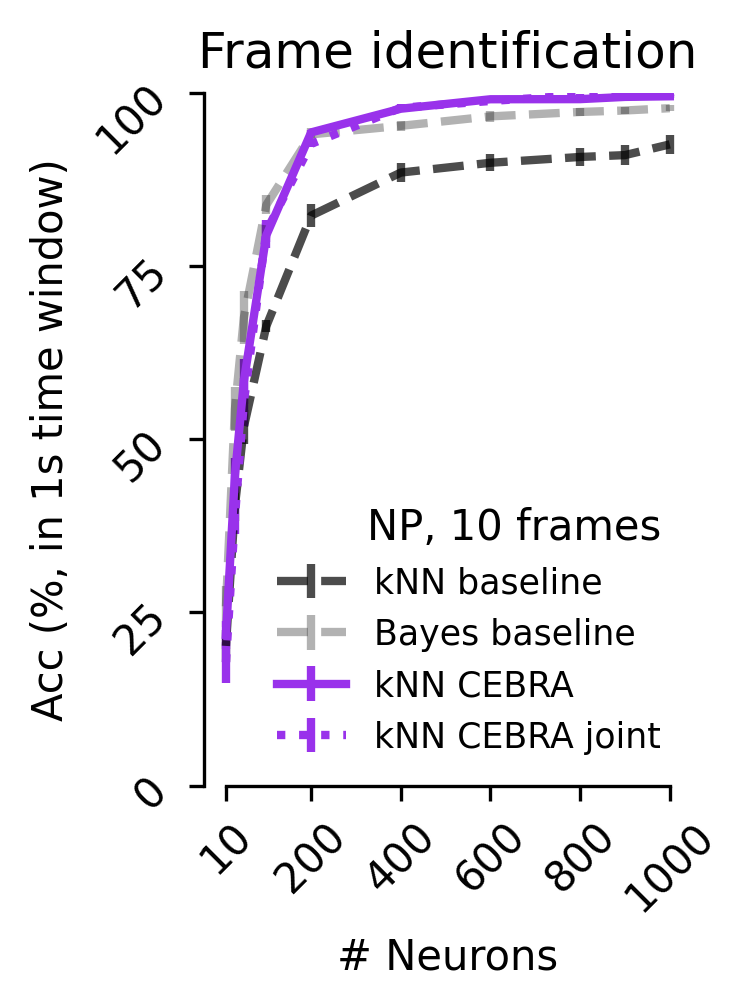

In [6]:
white = False

if white:
    white_c = "white"
else:
    white_c = "black"

scale = 0.3
fig_330 = plt.figure(figsize=(7 * scale, 10 * scale), dpi=300)
plt.title("Frame identification")
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)

c = "#9932EB"

ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_knn_baseline_330)[0],
    n_mean_err(frame_np_knn_baseline_330)[1],
    ls="--",
    label="kNN baseline",
    color="k",
    alpha=0.7,
    markersize=20,
    linewidth=LINEWIDTH,
)

ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_bayes_baseline_330)[0],
    n_mean_err(frame_np_bayes_baseline_330)[1],
    ls="--",
    label="Bayes baseline",
    color="k",
    alpha=0.3,
    markersize=20,
    linewidth=LINEWIDTH,
)

ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_cebra_knn_330)[0],
    n_mean_err(frame_np_cebra_knn_330)[1],
    label="kNN CEBRA",
    color=c,
    alpha=1,
    markersize=20,
    linewidth=LINEWIDTH,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_joint(frame_np_joint_cebra_knn_330, "np")[0],
    n_mean_err_joint(frame_np_joint_cebra_knn_330, "np")[1],
    ls="dotted",
    label="kNN CEBRA joint",
    color=c,
    alpha=1,
    markersize=20,
    linewidth=LINEWIDTH,
)

l1 = ax1.legend(
    loc="best",
    frameon=False,
    fontsize="small",
    title="NP, 10 frames",
    alignment="right",
)
for text in l1.get_texts():
    text.set_color(white_c)

set_ax(ax1, white_c)
ax1.set_ylim(0, 100)
sns.despine(trim=True, ax=ax1)

plt.savefig("FrameID_10frames_np.svg", transparent=True, bbox_inches="tight")
plt.show()

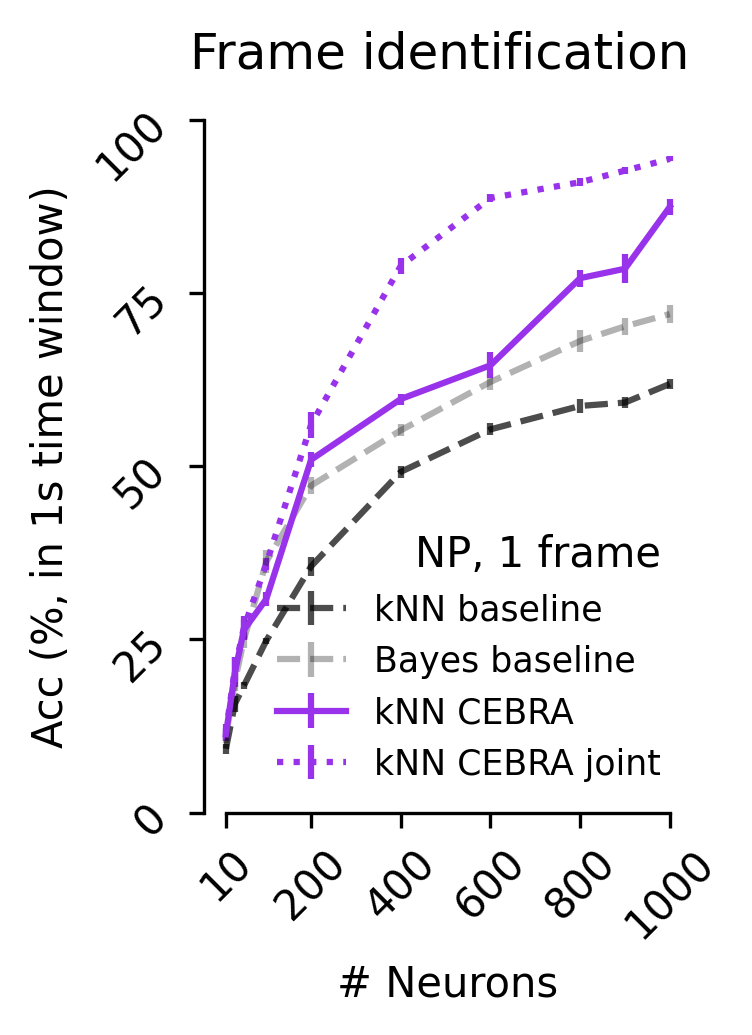

In [7]:
fig_33 = plt.figure(figsize=(7 * scale, 10 * scale), dpi=300)
fig_33.suptitle("Frame identification")
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)

c = "#9932EB"

ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_knn_baseline_33)[0],
    n_mean_err(frame_np_knn_baseline_33)[1],
    ls="--",
    label="kNN baseline",
    color="k",
    alpha=0.7,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_bayes_baseline_33)[0],
    n_mean_err(frame_np_bayes_baseline_33)[1],
    ls="--",
    label="Bayes baseline",
    color="k",
    alpha=0.3,
    markersize=20,
)


ax1.errorbar(
    num_neurons,
    n_mean_err(frame_np_cebra_knn_33)[0],
    n_mean_err(frame_np_cebra_knn_33)[1],
    label="kNN CEBRA",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_joint(frame_np_joint_cebra_knn_33, "np")[0],
    n_mean_err_joint(frame_np_joint_cebra_knn_33, "np")[1],
    ls="dotted",
    label="kNN CEBRA joint",
    color=c,
    alpha=1,
    markersize=20,
)

set_ax(ax1, white_c)

l1 = ax1.legend(
    loc="best", frameon=False, fontsize="small", title="NP, 1 frame", alignment="right"
)
for text in l1.get_texts():
    text.set_color(white_c)

sns.despine(ax=ax1, trim=True)
plt.savefig("FrameID_1frame_np.svg", transparent=True, bbox_inches="tight")
plt.show()

# d


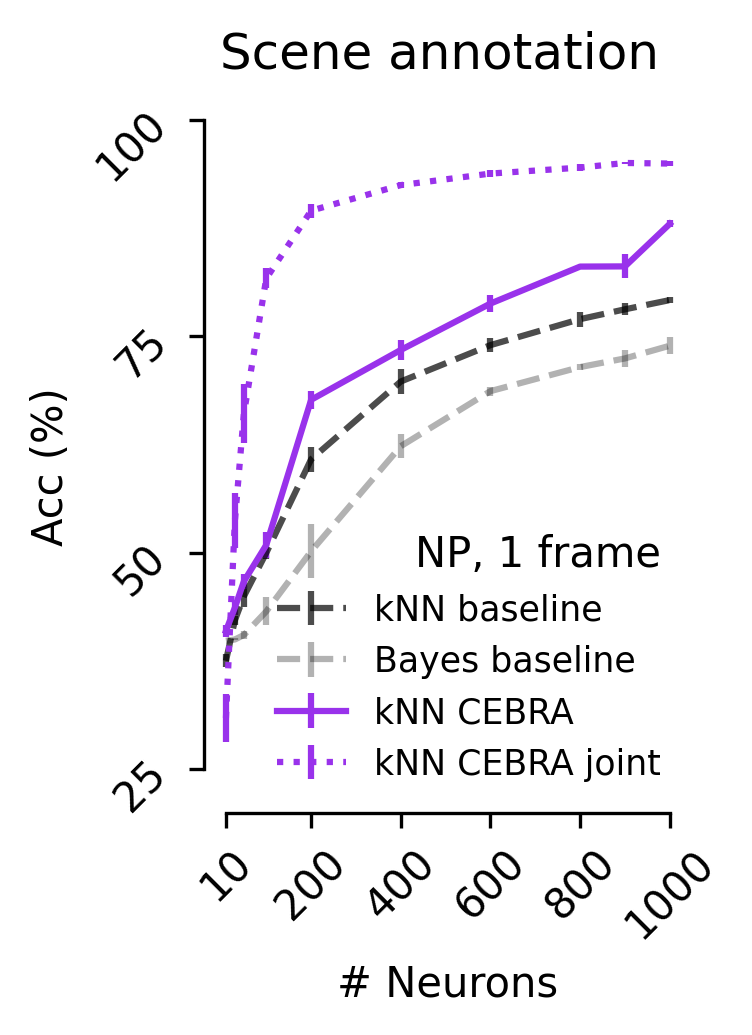

In [8]:
white = False

if white:
    white_c = "white"
else:
    white_c = "black"

fig_33 = plt.figure(figsize=(7 * scale, 10 * scale), dpi=300)
fig_33.suptitle("Scene annotation")
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)
ax1.errorbar(
    num_neurons,
    n_mean_err(scene_np_knn_baseline_33)[0] * 100,
    n_mean_err(scene_np_knn_baseline_33)[1] * 100,
    ls="--",
    label="kNN baseline",
    color="k",
    alpha=0.7,
    markersize=20,
)
ax1.errorbar(
    num_neurons,
    n_mean_err(scene_np_bayes_baseline_33)[0] * 100,
    n_mean_err(scene_np_bayes_baseline_33)[1] * 100,
    ls="--",
    label="Bayes baseline",
    color="k",
    alpha=0.3,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err(scene_np_cebra_knn_33)[0] * 100,
    n_mean_err(scene_np_cebra_knn_33)[1] * 100,
    label="kNN CEBRA",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_joint(scene_np_joint_cebra_knn_33, "np")[0] * 100,
    n_mean_err_joint(scene_np_joint_cebra_knn_33, "np")[1] * 100,
    ls="dotted",
    label="kNN CEBRA joint",
    color=c,
    alpha=1,
    markersize=20,
)

set_ax(ax1, white_c)
ax1.set_ylim(20, 100)
ax1.set_ylabel(f"Acc (%)", color=white_c)
sns.despine(ax=ax1, trim=True)
l1 = ax1.legend(
    loc="best", frameon=False, fontsize="small", title="NP, 1 frame", alignment="right"
)
for text in l1.get_texts():
    text.set_color(white_c)
plt.savefig("SceneAnnotation_1frame_np.svg", transparent=True, bbox_inches="tight")
plt.show()

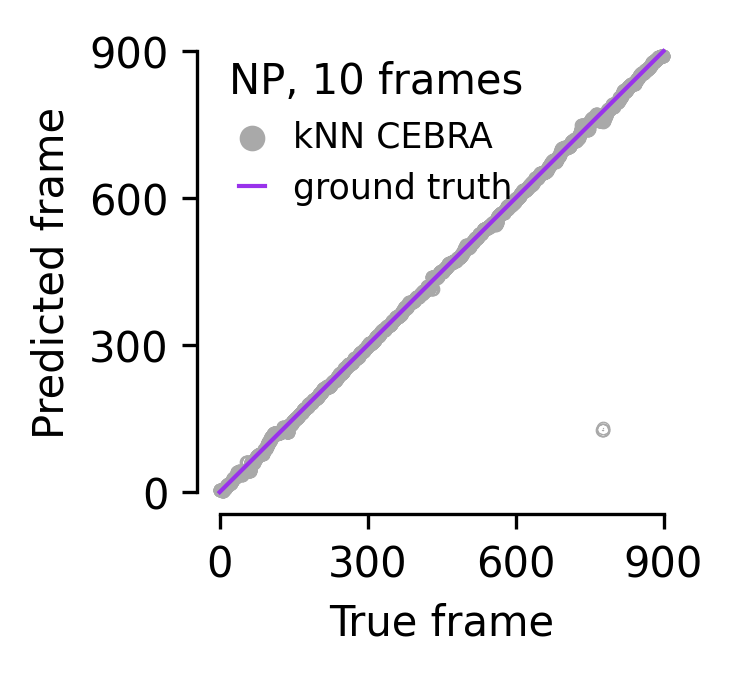

In [9]:
scale = 0.3
fig = plt.figure(figsize=(7 * scale, 7 * scale), dpi=300)
ax = plt.subplot(111)
frame_err = frame_np_cebra_knn_330_err[1000][3]
# ax.scatter(
#     np.repeat(np.arange(900), 4),
#     np.repeat(np.arange(900), 4) + frame_err,
#     s=0.1,
#     linewidths=5.0,
#     linewidth=3,
#     facecolors="none",
#     edgecolors="face",
#     c="darkgray",
#     label="kNN CEBRA",
# )
ax.scatter(
    np.repeat(np.arange(900), 4),
    np.repeat(np.arange(900), 4) + frame_err,
    s=0.1,
    linewidth=3,  # Use 'linewidth' here instead of 'linewidths'
    facecolors="none",
    edgecolors="face",
    c="darkgray",
    label="kNN CEBRA",
)
ax.plot(
    (0, 900),
    (0, 900),
    c="#9932EB",
    # zorder = -999,
    lw=1,
    label="ground truth",
)
ax.set_xticks(np.linspace(0, 900, 4))  # , np.linspace(0, 900, 4).astype(int))
ax.set_yticks(np.linspace(0, 900, 4))  # , np.linspace(0, 900, 4).astype(int))
ax.set_xlabel("True frame")
ax.set_ylabel("Predicted frame")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
sns.despine(trim=True, ax=ax)
ax.legend(
    frameon=False,
    fontsize="small",
    markerscale=10,
    title="NP, 10 frames",
    handlelength=0.75,
)
plt.savefig("TrueVsPredicted_10frame.svg", transparent=True, bbox_inches="tight")
plt.show()

# f


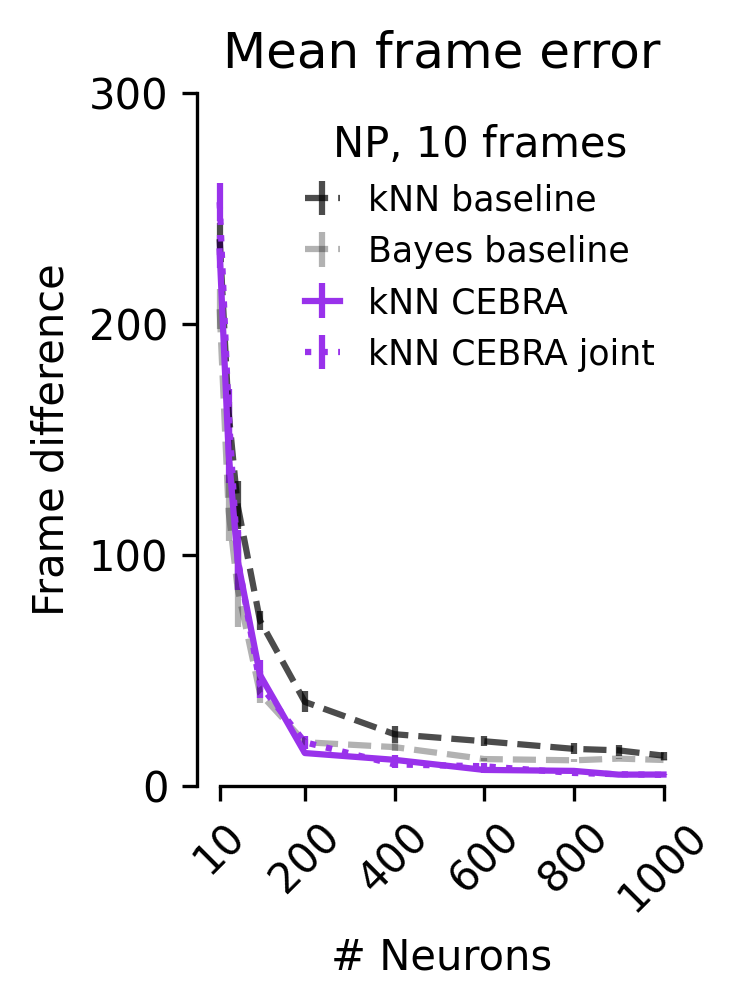

In [10]:
white = False

if white:
    white_c = "white"
else:
    white_c = "black"

num_neurons = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]


def set_ax(ax, white_c):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_color(white_c)
    ax.spines["bottom"].set_color(white_c)
    ax.set_xticks(
        [10, 200, 400, 600, 800, 1000],
        [10, 200, 400, 600, 800, 1000],
        color=white_c,
        rotation=45,
    )
    ax.set_yticks(
        np.linspace(0, 100, 5),
        np.linspace(0, 100, 5, dtype=int),
        color=white_c,
    )
    ax.set_xlabel("# Neurons", color=white_c)
    ax.set_ylabel("Acc (%, in 1s time window)", color=white_c)
    ax.tick_params(colors=white_c)


fig_330 = plt.figure(figsize=(7 * scale, 10 * scale), dpi=300)
plt.title(f"Mean frame error")
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)
c = "#9932EB"

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_knn_baseline_330_err)[0],
    n_mean_err_frame_diff(frame_np_knn_baseline_330_err)[1],
    ls="--",
    label="kNN baseline",
    color="k",
    alpha=0.7,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_bayes_baseline_330_err)[0],
    n_mean_err_frame_diff(frame_np_bayes_baseline_330_err)[1],
    ls="--",
    label="Bayes baseline",
    color="k",
    alpha=0.3,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_cebra_knn_330_err)[0],
    n_mean_err_frame_diff(frame_np_cebra_knn_330_err)[1],
    label="kNN CEBRA",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_330_err, "np")[0],
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_330_err, "np")[1],
    ls="dotted",
    label="kNN CEBRA joint",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.set_ylim(0, 300)
set_ax(ax1, white_c)
ax1.set_yticks(
    np.linspace(0, 300, 4),
    np.linspace(0, 300, 4, dtype=int),
    color=white_c,
)
ax1.set_ylabel("Frame difference")

l1 = ax1.legend(
    loc="best", frameon=False, title="NP, 10 frames", handlelength=1, fontsize="small"
)
for text in l1.get_texts():
    text.set_color(white_c)

sns.despine(trim=True)
plt.savefig("mean_frame_error_10frames.svg", transparent=True, bbox_inches="tight")
plt.show()

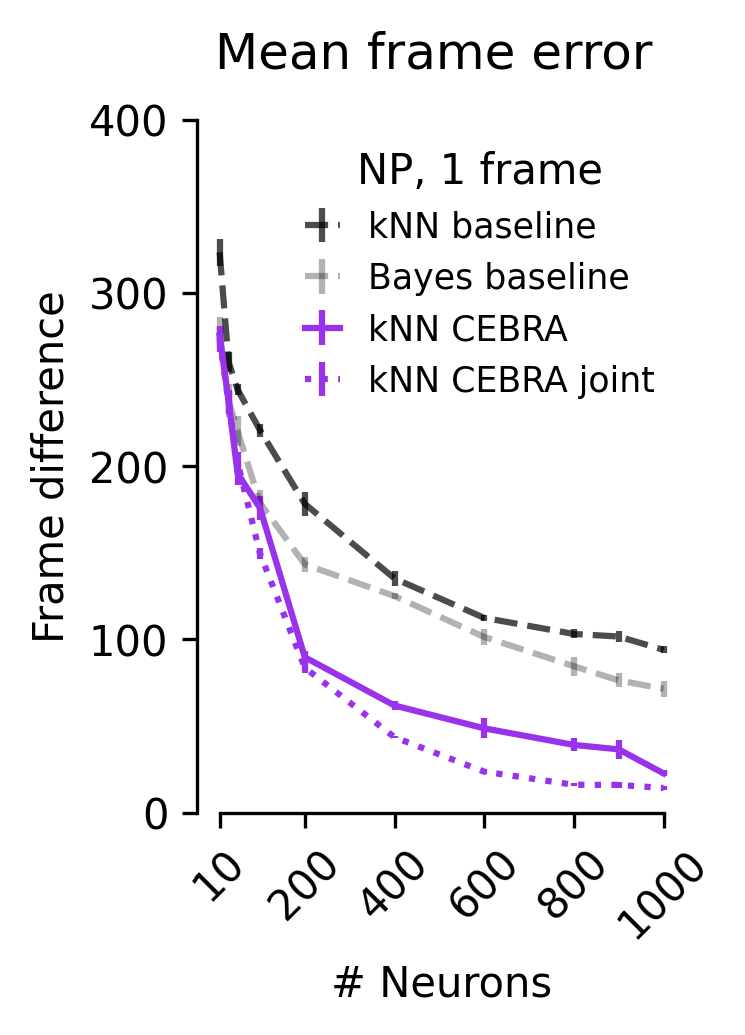

In [11]:
white = False

if white:
    white_c = "white"
else:
    white_c = "black"

fig_33 = plt.figure(figsize=(7 * scale, 10 * scale), dpi=300)
fig_33.suptitle(f"Mean frame error")
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)

c = "#9932EB"

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[0],
    n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[1],
    ls="--",
    label="kNN baseline",
    color="k",
    alpha=0.7,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[0],
    n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[1],
    ls="--",
    label="Bayes baseline",
    color="k",
    alpha=0.3,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[0],
    n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[1],
    label="kNN CEBRA",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err, "np")[0],
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err, "np")[1],
    ls="dotted",
    label="kNN CEBRA joint",
    color=c,
    alpha=1,
    markersize=20,
)

ax1.set_ylim(0, 400)
set_ax(ax1, white_c)
ax1.set_yticks(
    np.linspace(0, 400, 5),
    np.linspace(0, 400, 5, dtype=int),
    color=white_c,
)
ax1.set_ylabel("Frame difference")

l1 = ax1.legend(
    loc="best", frameon=False, title="NP, 1 frame", handlelength=1, fontsize="small"
)
for text in l1.get_texts():
    text.set_color(white_c)

sns.despine(trim=True, ax=ax1)
plt.savefig("mean_frame_error_1frame.svg", transparent=True, bbox_inches="tight")
plt.show()

# g


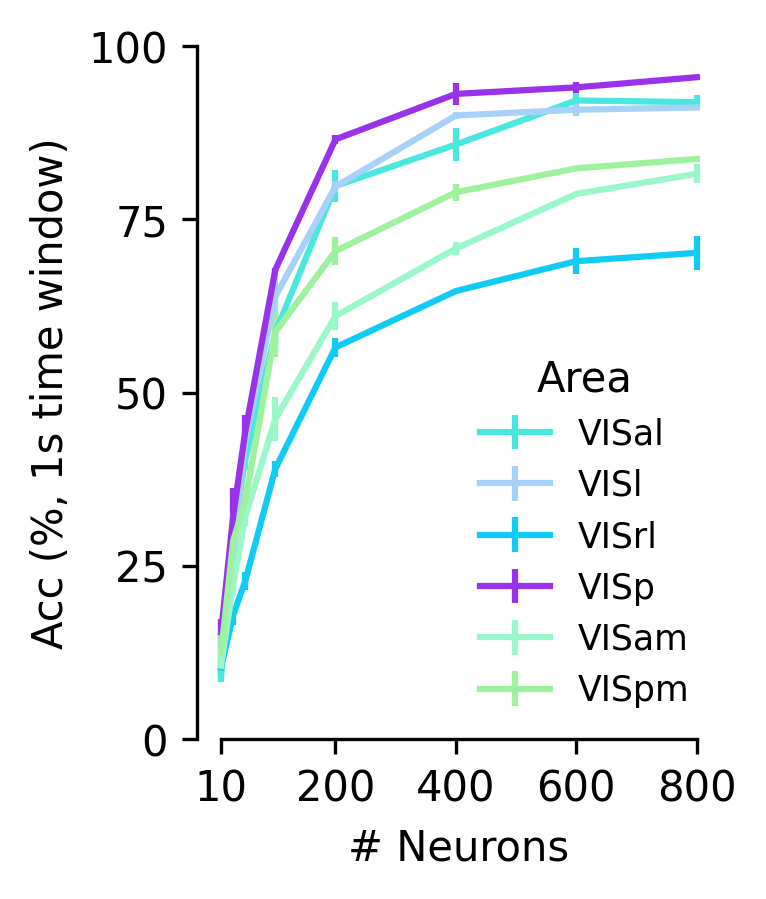

In [12]:
colors = {
    "VISl": "#A7D1F9",
    "VISrl": "#10CCF5",
    "VISal": "#49E7DD",
    "VISp": "#9932EB",
    "VISam": "#99F7CA",
    "VISpm": "#9EF19D",
}

np_decoding = data["cortex_decoding"]

fig = plt.figure(figsize=(7.5 * scale, 10 * scale), dpi=300)
# plt.title('Decoding by cortical area - DINO feature', fontsize=35, y=1.1)
ax = plt.subplot(111)
for area in ["VISal", "VISl", "VISrl", "VISp", "VISam", "VISpm"]:
    ax.errorbar(
        [10, 30, 50, 100, 200, 400, 600, 800],
        [np.mean(np_decoding[area][k]) for k in [10, 30, 50, 100, 200, 400, 600, 800]],
        [
            np.std(np_decoding[area][k]) / np.sqrt(len(np_decoding[area][k]))
            for k in [10, 30, 50, 100, 200, 400, 600, 800]
        ],
        label=area,
        # lw=5,
        color=colors[area],
    )

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xticks([10, 200, 400, 600, 800], [10, 200, 400, 600, 800], color="k")
plt.yticks(np.linspace(0, 100, 5), np.linspace(0, 100, 5, dtype=int), color="k")

plt.xlabel("# Neurons")
plt.ylabel("Acc (%, 1s time window)")
plt.ylim(0, 100)
l = plt.legend(frameon=False, fontsize="small", title="Area")
sns.despine(trim=True, ax=plt.gca())
plt.savefig("visual_areas.svg", transparent=True, bbox_inches="tight")
plt.show()

# h


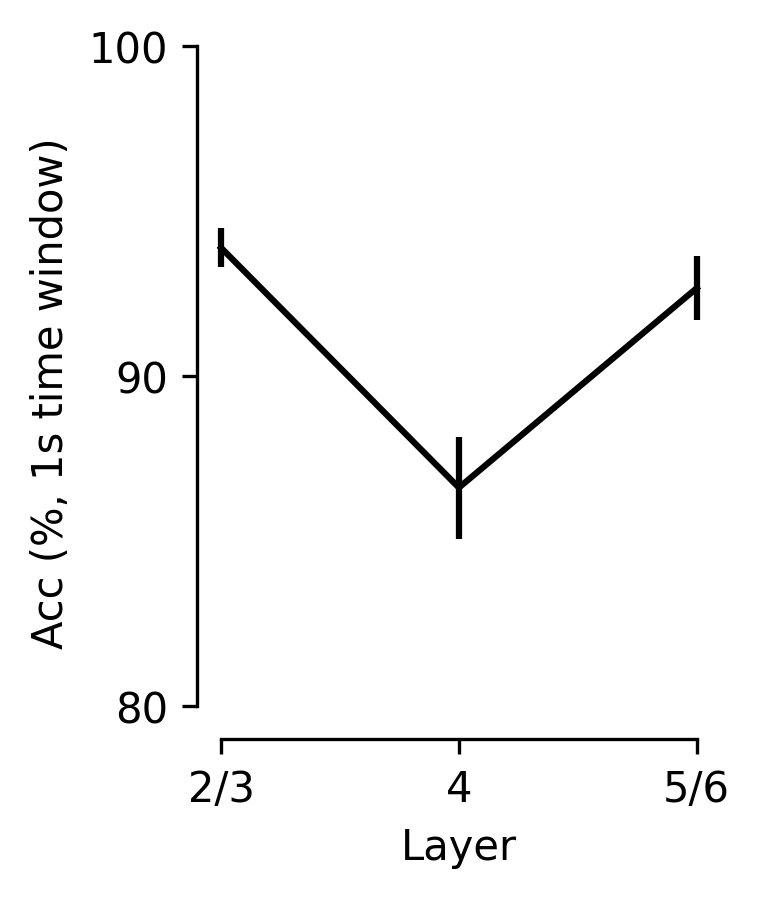

In [13]:
layer_decoding = data["layer_decoding"][900]
fig = plt.figure(figsize=(7.5 * scale, 10 * scale), dpi=300)
ax = fig.add_subplot(111)

labels = ["900"]
colors = ["black", "gray", "lightgray"]

ax.errorbar(
    np.arange(3),
    [np.mean(layer_decoding[layer]) for layer in [2, 4, 5]],
    [
        np.std(layer_decoding[layer]) / np.sqrt(len(layer_decoding[layer]))
        for layer in [2, 4, 5]
    ],
    c="k",
    # lw=4,
)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["2/3", "4", "5/6"])
ax.set_yticks(np.linspace(70, 100, 4))
ax.set_yticklabels(np.linspace(70, 100, 4, dtype=int))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.ylabel("Acc (%, 1s time window)")
plt.xlabel("Layer")
plt.ylim(79, 100)
sns.despine(trim=True, ax=plt.gca())
plt.savefig("layer_comparison.svg", transparent=True, bbox_inches="tight")
plt.show()